# Esercizio Abilità Informatiche

## Importo i pacchetti

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

## Costanti

In [2]:
Ntests = 3
Nmultipoles = 3
Nbins = 200
Nmeasures = 10000

sigma = [[0.02, 0.02, 0.02], [0.02, 0.01, 0.005], [0.02, 0.01, 0.005]]
h = [[25, 50, 75], [50, 50, 50], [5, 5, 5]]

## Funzioni

In [3]:
#def autocorr(x1,x2,sigma,h):
    #return sigma**2*np.exp(-(x1-x2)**2/(2*h**2))

def corr(x1,x2,sigma1,sigma2,h1,h2):
    return sigma1*sigma2*np.sqrt((2*h1*h2)/(h1**2+h2**2))*np.exp(-(x1-x2)**2/(h1**2+h2**2))

## Lettura file

Il programma si trova all'interno della cartella 'data', assieme alle cartelle 'MockMeasures_2PCF_Test1', 'MockMeasures_2PCF_Test2' e 'MockMeasures_2PCF_Test3'.

In [4]:
measures = []
scale = []
for test in range(Ntests):
    measures.append([[],[],[]])
    scale.append([])
    for i in np.arange(Nmeasures)+1:
        fname = f'MockMeasures_2PCF_Test{test+1}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test+1}_{i}.fits'
          
        file = fits.open(fname)
        table = file[1].data.copy()
        measures[test][0].append(table['XI0'])
        measures[test][1].append(table['XI2'])
        measures[test][2].append(table['XI4'])
        if i==1:
            scale[test] = table['SCALE']
        del table
        file.close
    
    for m in range(Nmultipoles):
        measures[test][m] = np.asarray(measures[test][m])
        measures[test][m] = np.asarray(measures[test][m]).transpose()

## Calcolo (delle medie e) delle matrici di correlazione misurate

In [5]:
# ave_exp = np.zeros((Ntests,Nmultipoles,Nbins))
cov_exp = np.zeros((Ntests,Nmultipoles,Nmultipoles,2*Nbins,2*Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        # ave_exp[test][m] = np.mean(measures[test][m], axis=1)
        for mm in range (Nmultipoles):
            cov_exp[test][m][mm] = np.cov(measures[test][m],measures[test][mm])
            

c_exp = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nbins,Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range (Nmultipoles):
            for i in range(Nbins):
                for j in range(Nbins):
                    c_exp[test][m][mm][i][j] = cov_exp[test][m][mm][i][j+200]

### Grafici delle matrici di correlazione misurate

Test 1
Autocorrelazione multipolo 0


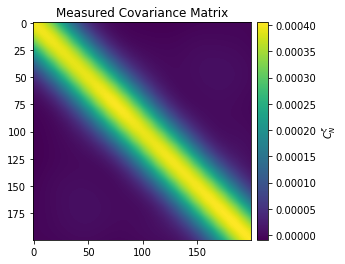

Test 1
Crosscorrelazione multipoli 0 2


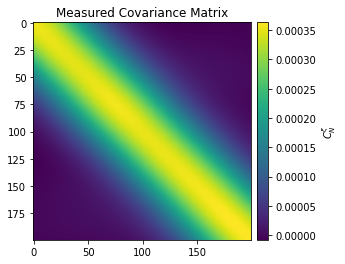

Test 1
Crosscorrelazione multipoli 0 4


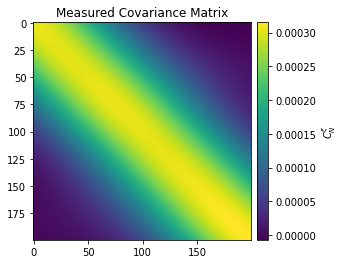

Test 1
Autocorrelazione multipolo 2


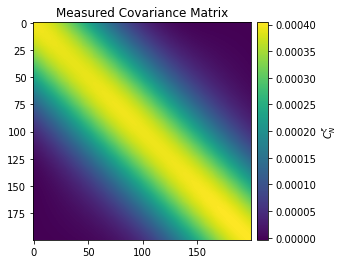

Test 1
Crosscorrelazione multipoli 2 4


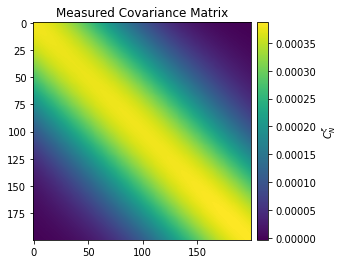

Test 1
Autocorrelazione multipolo 4


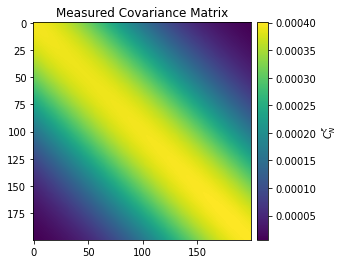

Test 2
Autocorrelazione multipolo 0


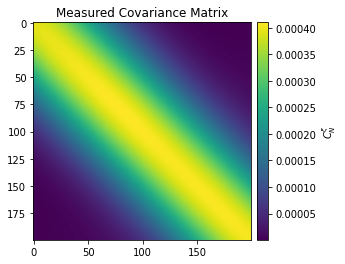

Test 2
Crosscorrelazione multipoli 0 2


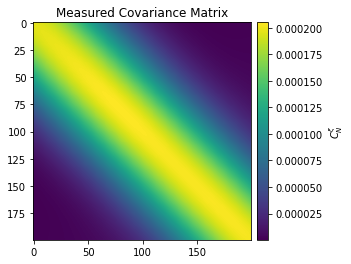

Test 2
Crosscorrelazione multipoli 0 4


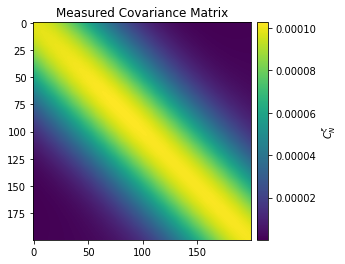

Test 2
Autocorrelazione multipolo 2


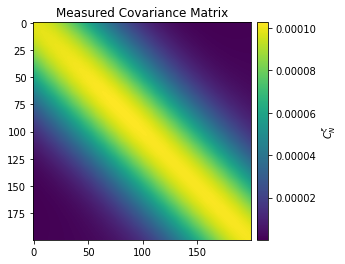

Test 2
Crosscorrelazione multipoli 2 4


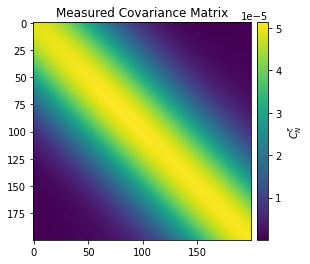

Test 2
Autocorrelazione multipolo 4


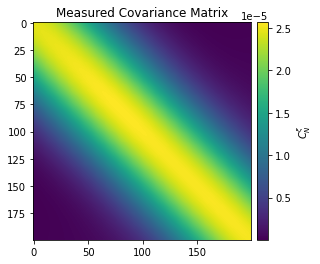

Test 3
Autocorrelazione multipolo 0


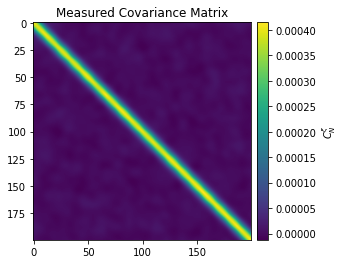

Test 3
Crosscorrelazione multipoli 0 2


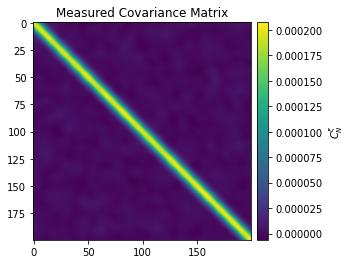

Test 3
Crosscorrelazione multipoli 0 4


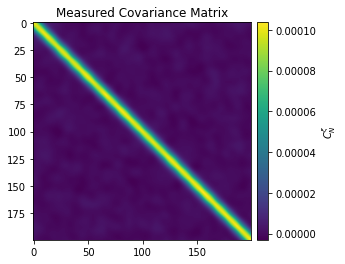

Test 3
Autocorrelazione multipolo 2


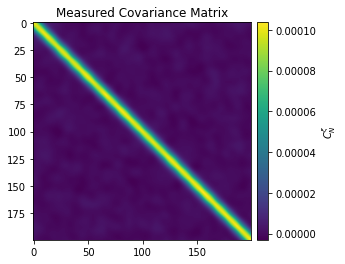

Test 3
Crosscorrelazione multipoli 2 4


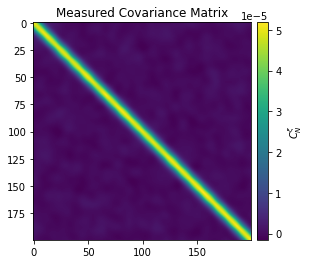

Test 3
Autocorrelazione multipolo 4


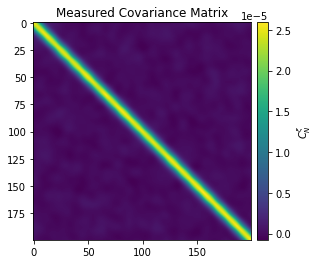

In [6]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            print("Test", test+1)
            if m==mm: print("Autocorrelazione multipolo", 2*m)
            else: print("Crosscorrelazione multipoli", 2*m, 2*mm)
            fig = plt.figure()
            plt.title('Measured Covariance Matrix')
            plt.imshow(c_exp[test][m][mm], vmin=np.min(c_exp[test][m][mm]), vmax=np.max(c_exp[test][m][mm]))
            cbar = plt.colorbar(orientation="vertical", pad=0.02)
            cbar.set_label(r'$ C^{\xi}_{N}$')
            plt.show()

## Calcolo delle matrici di correlazione misurate normalizzate sulla diagonale

In [7]:
R_exp = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nbins,Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(Nmultipoles):
            for i in np.arange(Nbins):
                for j in np.arange(Nbins):
                    R_exp[test][m][mm][i][j] = c_exp[test][m][mm][i][j]**2/np.sqrt(c_exp[test][m][mm][i][i]*c_exp[test][m][mm][j][j])**2

### Grafici delle matrici di correlazione misurate normalizzate sulla diagonale

Test 1
Autocorrelazione multipolo 0


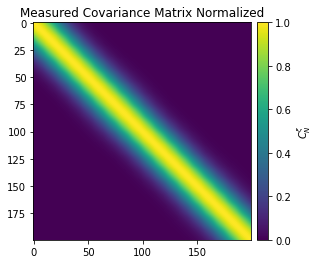

Test 1
Crosscorrelazione multipoli 0 2


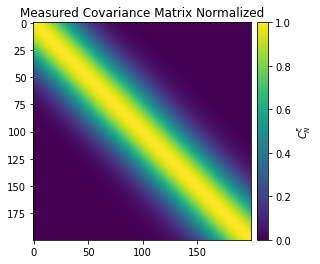

Test 1
Crosscorrelazione multipoli 0 4


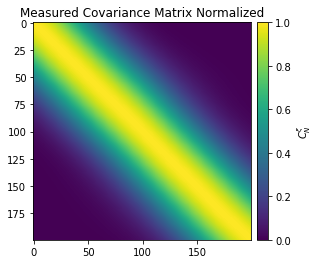

Test 1
Autocorrelazione multipolo 2


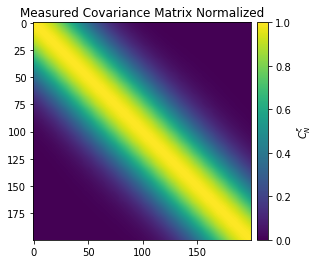

Test 1
Crosscorrelazione multipoli 2 4


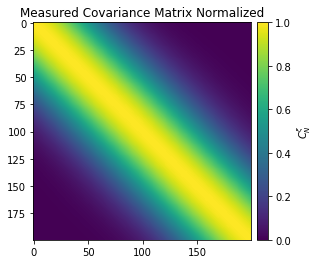

Test 1
Autocorrelazione multipolo 4


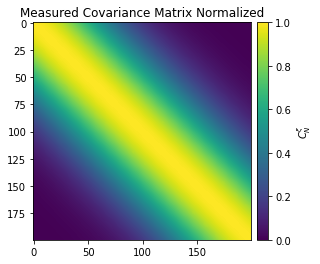

Test 2
Autocorrelazione multipolo 0


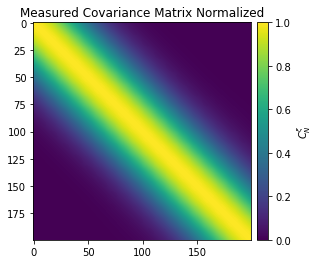

Test 2
Crosscorrelazione multipoli 0 2


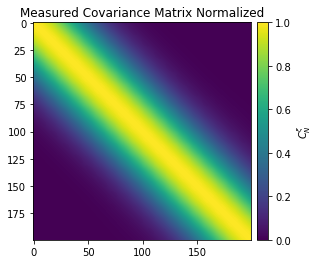

Test 2
Crosscorrelazione multipoli 0 4


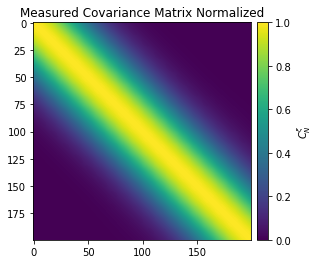

Test 2
Autocorrelazione multipolo 2


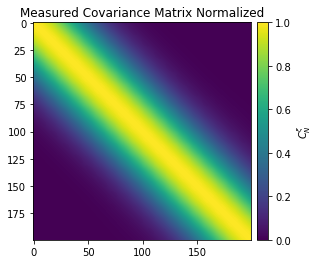

Test 2
Crosscorrelazione multipoli 2 4


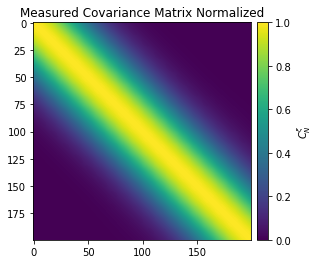

Test 2
Autocorrelazione multipolo 4


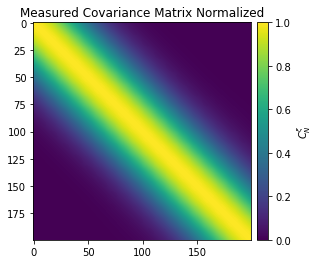

Test 3
Autocorrelazione multipolo 0


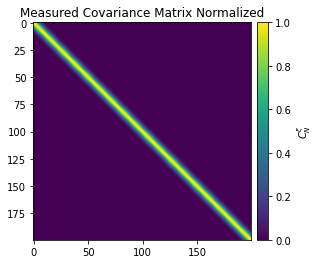

Test 3
Crosscorrelazione multipoli 0 2


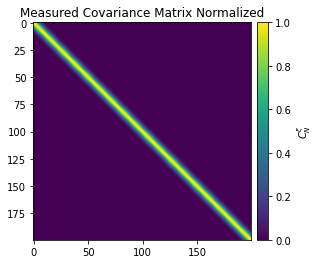

Test 3
Crosscorrelazione multipoli 0 4


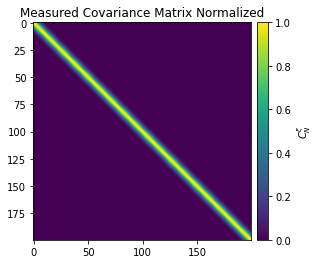

Test 3
Autocorrelazione multipolo 2


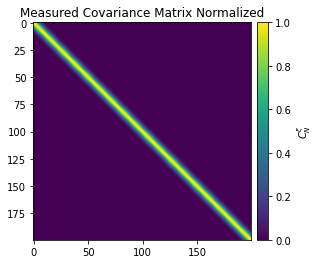

Test 3
Crosscorrelazione multipoli 2 4


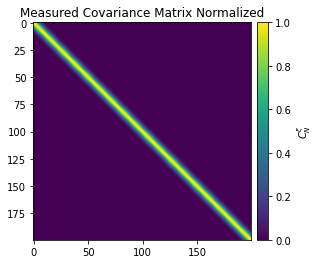

Test 3
Autocorrelazione multipolo 4


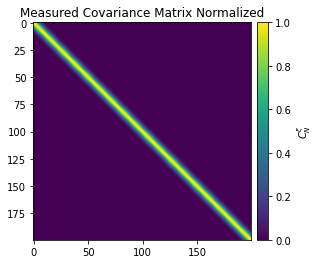

In [8]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            print("Test", test+1)
            if m==mm: print("Autocorrelazione multipolo", 2*m)
            else: print("Crosscorrelazione multipoli", 2*m, 2*mm)
            fig = plt.figure()
            plt.title('Measured Covariance Matrix Normalized')
            plt.imshow(R_exp[test][m][mm], vmin=0, vmax=1)
            cbar = plt.colorbar(orientation="vertical", pad=0.02)
            cbar.set_label(r'$ C^{\xi}_{N}$')
            plt.show()

## Calcolo delle matrici di correlazione teoriche

In [9]:
c_th = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nbins,Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(Nmultipoles):
            for i in range(Nbins):
                for j in range(Nbins):
                    c_th[test][m][mm][i][j] = corr(scale[test][i],scale[test][j],sigma[test][m],sigma[test][mm],h[test][m],h[test][mm])

### Grafici delle matrici di correlazione teoriche

Test 1
Autocorrelazione multipolo 0


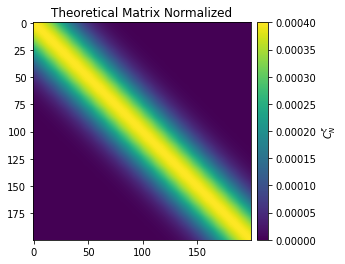

Test 1
Crosscorrelazione multipoli 0 2


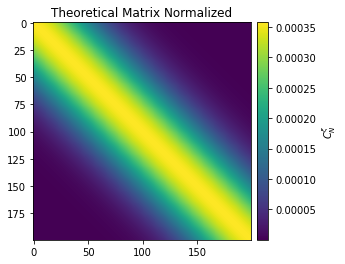

Test 1
Crosscorrelazione multipoli 0 4


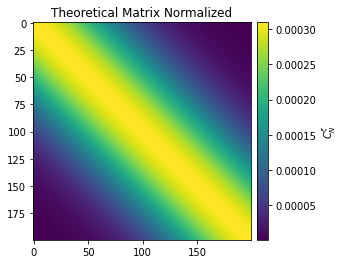

Test 1
Autocorrelazione multipolo 2


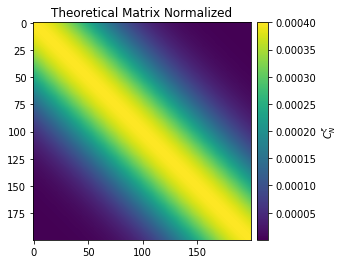

Test 1
Crosscorrelazione multipoli 2 4


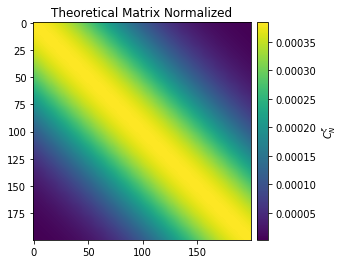

Test 1
Autocorrelazione multipolo 4


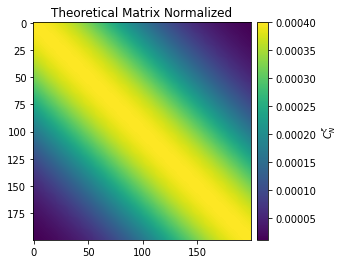

Test 2
Autocorrelazione multipolo 0


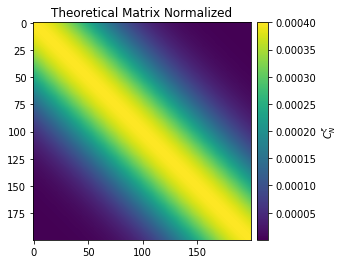

Test 2
Crosscorrelazione multipoli 0 2


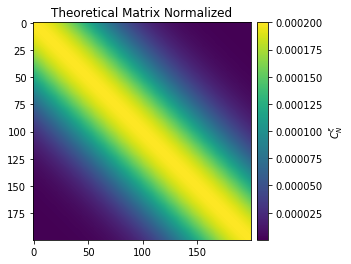

Test 2
Crosscorrelazione multipoli 0 4


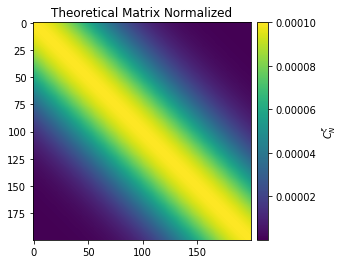

Test 2
Autocorrelazione multipolo 2


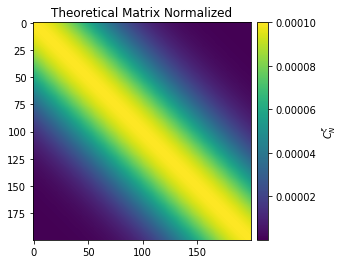

Test 2
Crosscorrelazione multipoli 2 4


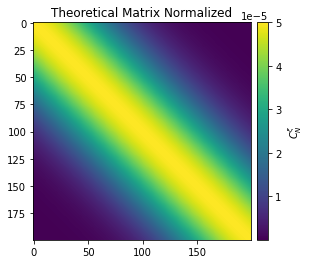

Test 2
Autocorrelazione multipolo 4


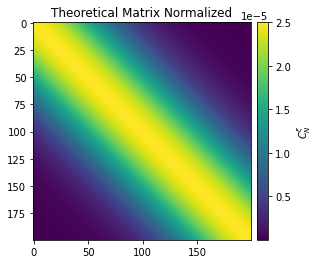

Test 3
Autocorrelazione multipolo 0


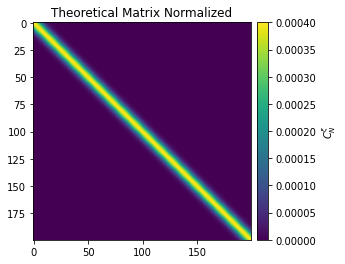

Test 3
Crosscorrelazione multipoli 0 2


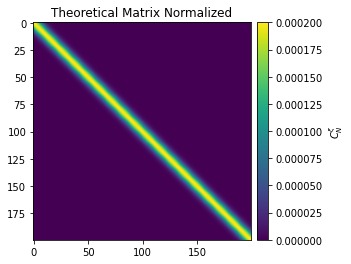

Test 3
Crosscorrelazione multipoli 0 4


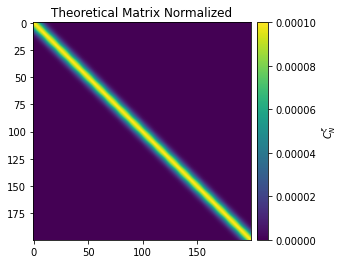

Test 3
Autocorrelazione multipolo 2


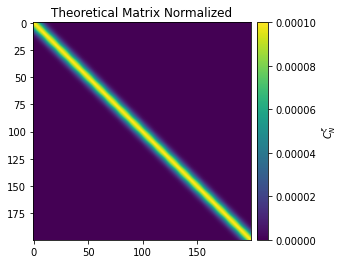

Test 3
Crosscorrelazione multipoli 2 4


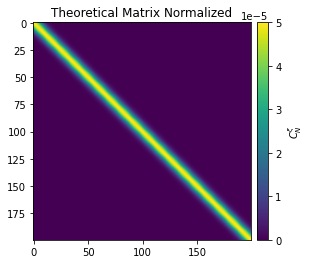

Test 3
Autocorrelazione multipolo 4


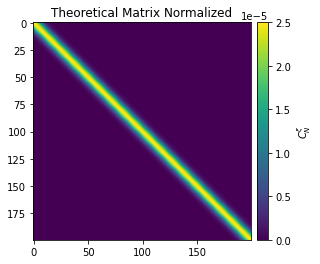

In [10]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            print("Test", test+1)
            if m==mm: print("Autocorrelazione multipolo", 2*m)
            else: print("Crosscorrelazione multipoli", 2*m, 2*mm)
            fig = plt.figure()
            plt.title('Theoretical Matrix Normalized')
            plt.imshow(c_th[test][m][mm], vmin=np.min(c_th[test][m][mm]), vmax=np.max(c_th[test][m][mm]))
            cbar = plt.colorbar(orientation="vertical", pad=0.02)
            cbar.set_label(r'$ C^{\xi}_{N}$')
            plt.show()

## Calcolo delle matrici di correlazione teoriche normalizzate sulla diagonale

In [11]:
R_th = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nbins,Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(Nmultipoles):
            for i in np.arange(Nbins):
                for j in np.arange(Nbins):
                    R_th[test][m][mm][i][j] = c_th[test][m][mm][i][j]**2/np.sqrt(c_th[test][m][mm][i][i]*c_th[test][m][mm][j][j])**2

### Grafici delle matrici di correlazione teoriche normalizzate sulla diagonale

Test 1
Autocorrelazione multipolo 0


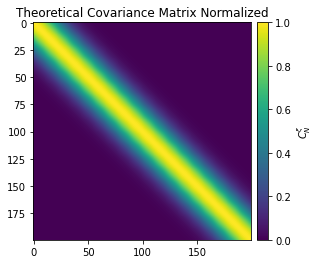

Test 1
Crosscorrelazione multipoli 0 2


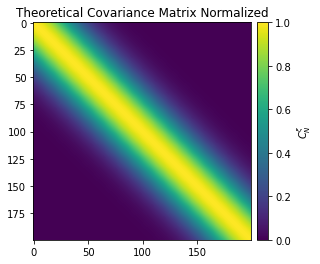

Test 1
Crosscorrelazione multipoli 0 4


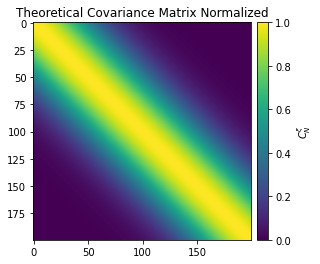

Test 1
Autocorrelazione multipolo 2


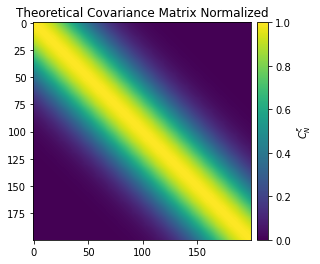

Test 1
Crosscorrelazione multipoli 2 4


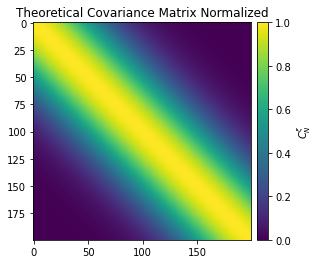

Test 1
Autocorrelazione multipolo 4


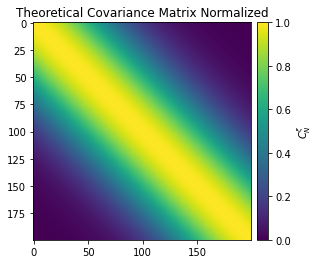

Test 2
Autocorrelazione multipolo 0


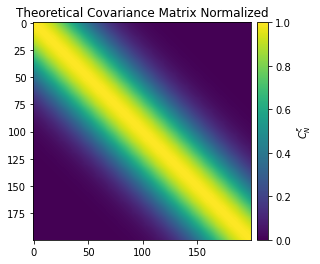

Test 2
Crosscorrelazione multipoli 0 2


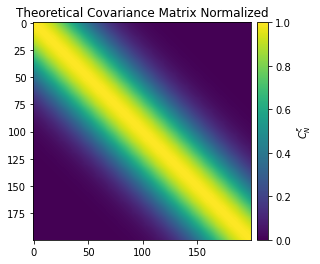

Test 2
Crosscorrelazione multipoli 0 4


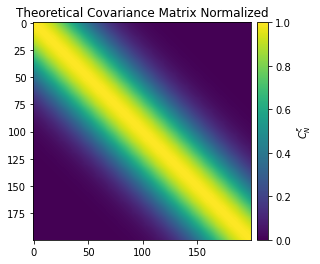

Test 2
Autocorrelazione multipolo 2


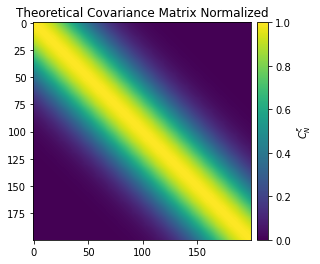

Test 2
Crosscorrelazione multipoli 2 4


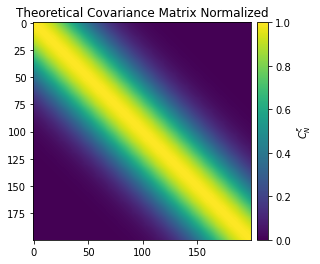

Test 2
Autocorrelazione multipolo 4


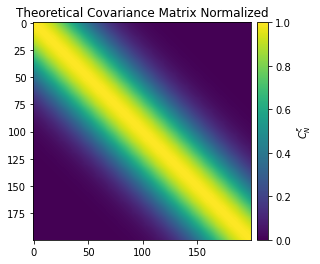

Test 3
Autocorrelazione multipolo 0


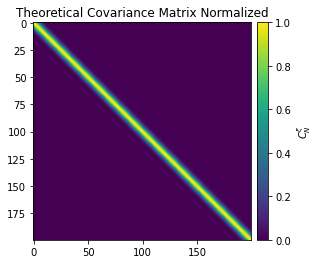

Test 3
Crosscorrelazione multipoli 0 2


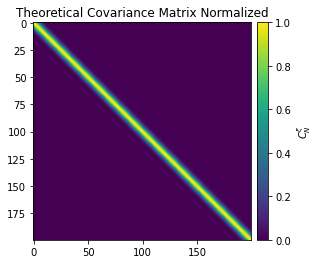

Test 3
Crosscorrelazione multipoli 0 4


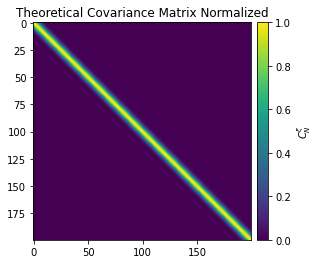

Test 3
Autocorrelazione multipolo 2


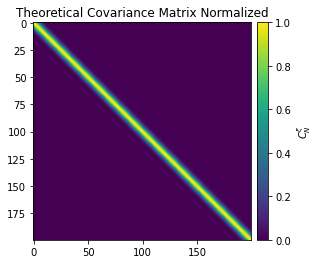

Test 3
Crosscorrelazione multipoli 2 4


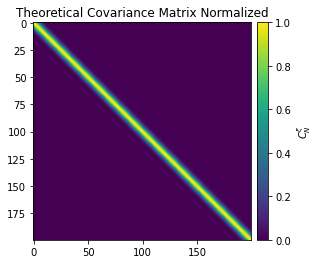

Test 3
Autocorrelazione multipolo 4


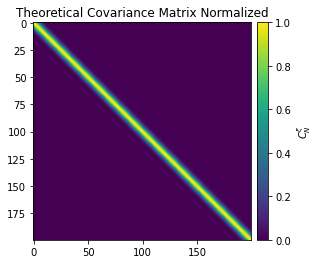

In [12]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            print("Test", test+1)
            if m==mm: print("Autocorrelazione multipolo", 2*m)
            else: print("Crosscorrelazione multipoli", 2*m, 2*mm)
            fig = plt.figure()
            plt.title('Theoretical Covariance Matrix Normalized')
            plt.imshow(R_th[test][m][mm], vmin=0, vmax=1)
            cbar = plt.colorbar(orientation="vertical", pad=0.02)
            cbar.set_label(r'$ C^{\xi}_{N}$')
            plt.show()

## Validazione delle matrici di correlazione

Calcolo i residui tra covarianza teorica e misurata, normalizzati sulla covarianza.

In [13]:
Res = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nmultipoles,Nmultipoles,Nbins,Nbins))
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(Nmultipoles):
            for n in range(Nmultipoles):
                for nn in range(Nmultipoles):
                    for i in np.arange(Nbins):
                        for j in np.arange(Nbins):
                            Res[test][m][mm][n][nn][i][j] = (c_th[test][n][nn][i][j]-c_exp[test][m][mm][i][j])*np.sqrt((Nmeasures-1)/((1+R_exp[test][m][mm][i][j])*c_th[test][n][nn][i][i]*c_th[test][n][nn][j][j]))

Calcolo le deviazioni standard delle matrici Res, allineandole su vettori 1D di lunghezza Nbins x Nbins. \
Alle matrici di correlazione validate viene associato il valore 'True', mentre a quelle non validate viene associato il valore 'False'.

In [14]:
rms_dev = np.zeros((Ntests,Nmultipoles,Nmultipoles,Nmultipoles,Nmultipoles))
mulpol = []
for test in range(Ntests):
    mulpol.append([])
    for m in range(Nmultipoles):
        mulpol[test].append([])
        for mm in range(Nmultipoles):
            mulpol[test][m].append([])
            for n in range(Nmultipoles):
                mulpol[test][m][mm].append([])
                for nn in range(Nmultipoles):
                    rms_dev[test][m][mm][n][nn]=np.std(Res[test][m][mm][n][nn].reshape(Nbins**2))
                    if rms_dev[test][m][mm][n][nn]<=1.1:
                        mulpol[test][m][mm][n].append(True)
                    else:
                        mulpol[test][m][mm][n].append(False)

### Output dei test di validazione

In [23]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            for n in range(Nmultipoles):
                for nn in range(n,Nmultipoles):
                    if (mulpol[test][m][mm][n][nn] or (m==n and mm==nn)):
                        print("Test", test+1)
                        if m==mm: print("", "Autocorrelazione misurata multipolo", 2*m)
                        else: print("", "Crosscorrelazione misurata multipoli", 2*m, 2*mm)
                        if n==nn: print("", "", "Verifica con autocorrelazione teorica multipolo", 2*n)
                        else: print("", "", "Verifica con crosscorrelazione teorica multipoli", 2*n, 2*nn)
                        print("", "", "", rms_dev[test][m][mm][n][nn])
                        print("", "", "", "", mulpol[test][m][mm][n][nn])
                        print()

Test 1
 Autocorrelazione misurata multipolo 0
  Verifica con autocorrelazione teorica multipolo 0
   0.9814066714842083
    True

Test 1
 Crosscorrelazione misurata multipoli 0 2
  Verifica con crosscorrelazione teorica multipoli 0 2
   1.0212234501388147
    True

Test 1
 Crosscorrelazione misurata multipoli 0 4
  Verifica con crosscorrelazione teorica multipoli 0 4
   1.1433332113352292
    False

Test 1
 Autocorrelazione misurata multipolo 2
  Verifica con autocorrelazione teorica multipolo 2
   0.7469066709692659
    True

Test 1
 Crosscorrelazione misurata multipoli 2 4
  Verifica con crosscorrelazione teorica multipoli 2 4
   0.6961738061223822
    True

Test 1
 Autocorrelazione misurata multipolo 4
  Verifica con autocorrelazione teorica multipolo 4
   0.5862267510349217
    True

Test 2
 Autocorrelazione misurata multipolo 0
  Verifica con autocorrelazione teorica multipolo 0
   0.6400367769052793
    True

Test 2
 Crosscorrelazione misurata multipoli 0 2
  Verifica con crossco

### Grafici dei residui delle matrici di correlazione

Test 1
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


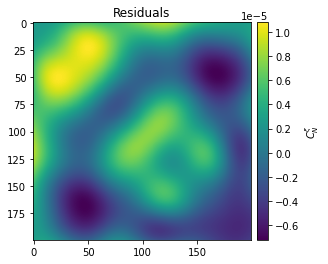

Test 1
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


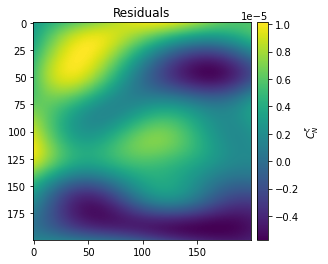

Test 1
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
False


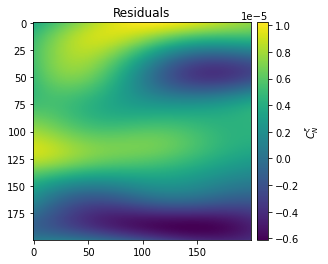

Test 1
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


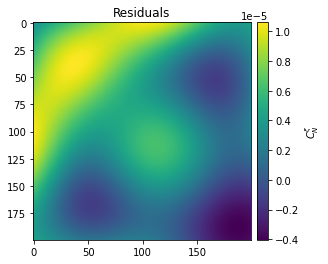

Test 1
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


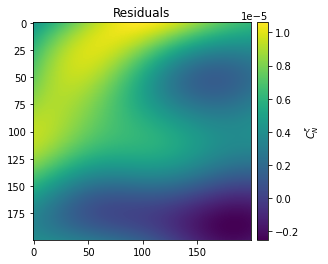

Test 1
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


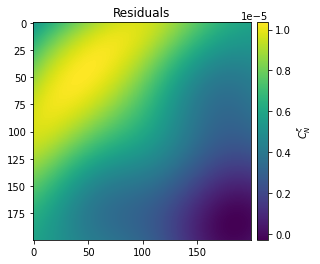

Test 2
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


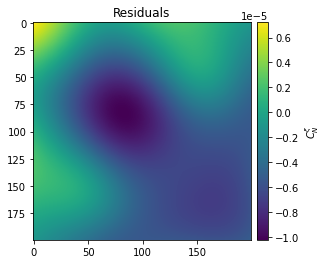

Test 2
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


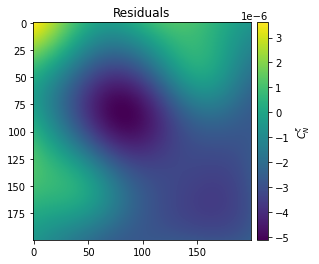

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


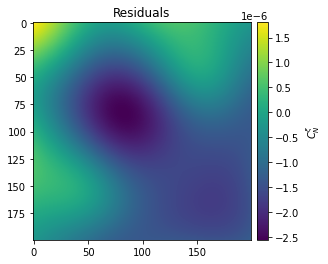

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


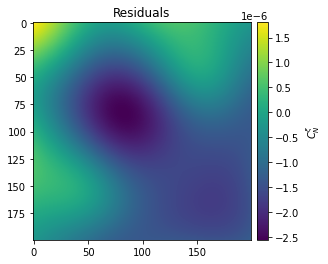

Test 2
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


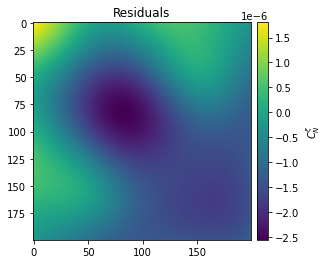

Test 2
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


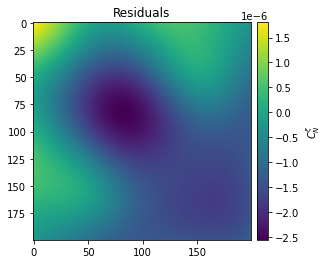

Test 2
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


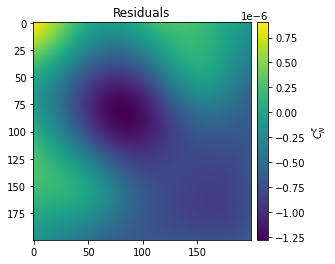

Test 2
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


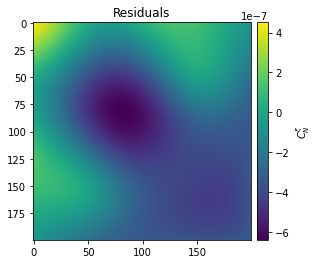

Test 3
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


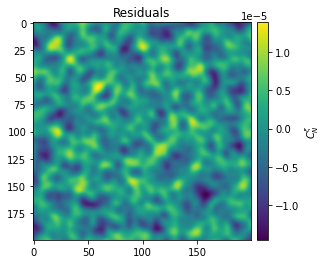

Test 3
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


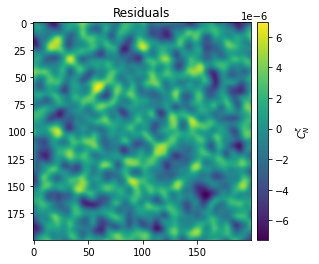

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


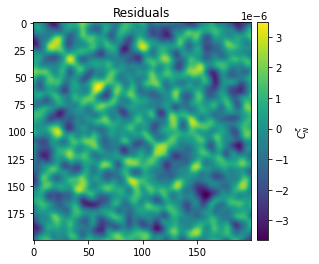

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


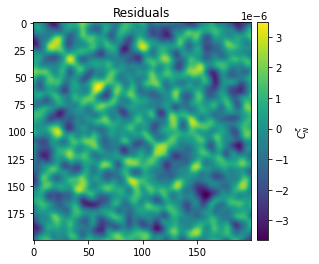

Test 3
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


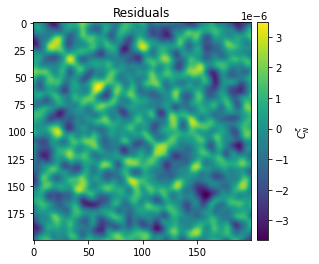

Test 3
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


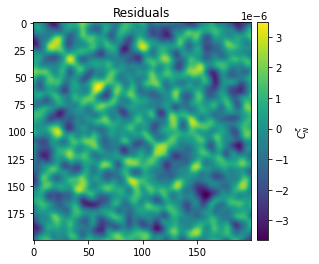

Test 3
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


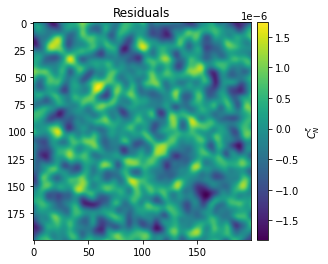

Test 3
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


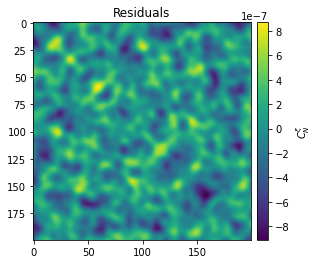

In [19]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            for n in range(Nmultipoles):
                for nn in range(n,Nmultipoles):
                    if (mulpol[test][m][mm][n][nn] or (m==n and mm==nn)):
                        print("Test", test+1)
                        if m==mm: print("Autocorrelazione misurata multipolo", 2*m)
                        else: print("Crosscorrelazione misurata multipoli", 2*m, 2*mm)
                        if n==nn: print("Verifica con autocorrelazione teorica multipolo", 2*n)
                        else: print("Verifica con crosscorrelazione teorica multipoli", 2*n, 2*nn)
                        print(mulpol[test][m][mm][n][nn])   
                        diff = c_th[test][n][nn]-c_exp[test][m][mm]
                        fig = plt.figure()
                        plt.title('Residuals')
                        plt.imshow(diff, vmin=np.min(diff), vmax=np.max(diff))
                        cbar = plt.colorbar(orientation="vertical", pad=0.02)
                        cbar.set_label(r'$ C^{\xi}_{N}$')
                        plt.show()

### Grafici dei residui delle matrici normalizzate

Test 1
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


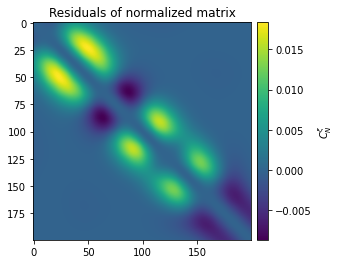

Test 1
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


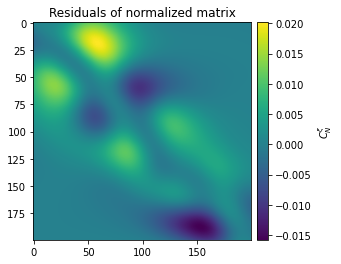

Test 1
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
False


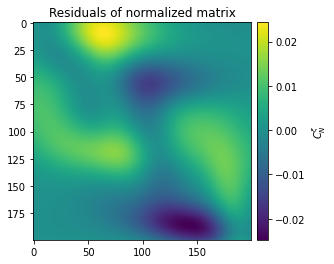

Test 1
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


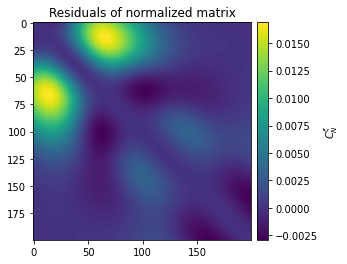

Test 1
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


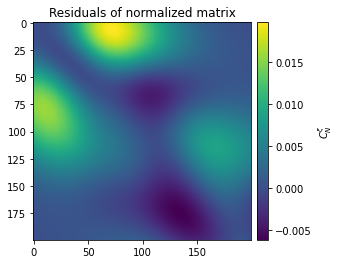

Test 1
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


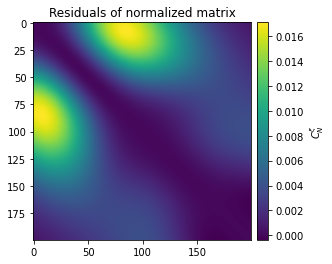

Test 2
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


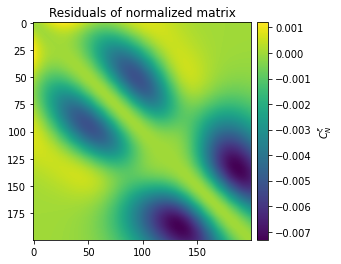

Test 2
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


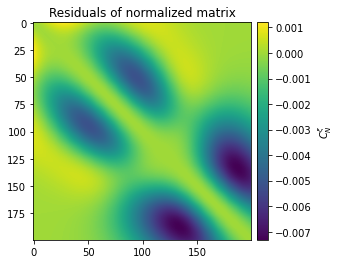

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


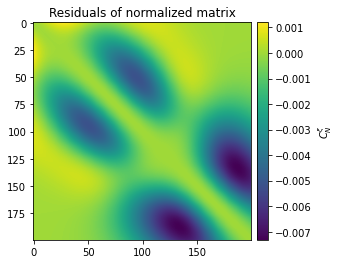

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


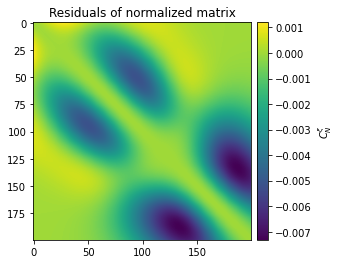

Test 2
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


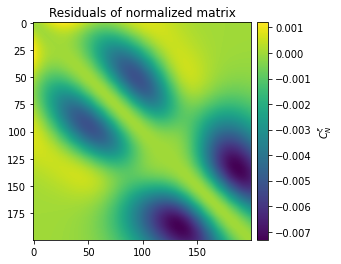

Test 2
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


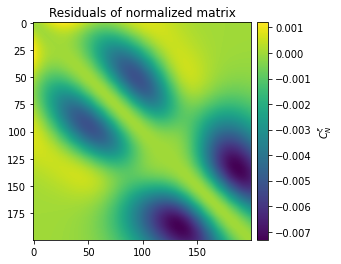

Test 2
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


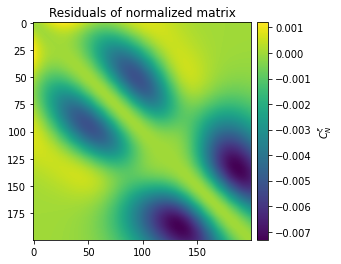

Test 2
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


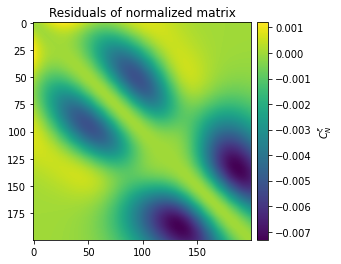

Test 3
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


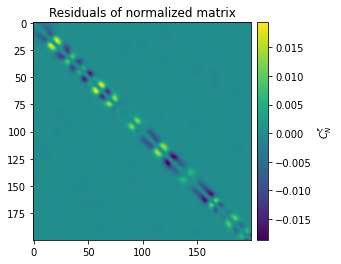

Test 3
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


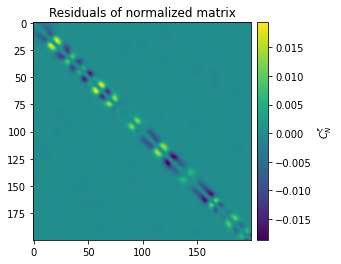

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


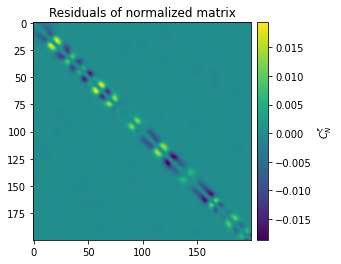

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


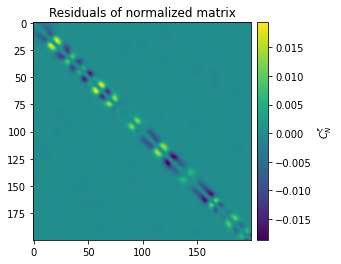

Test 3
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


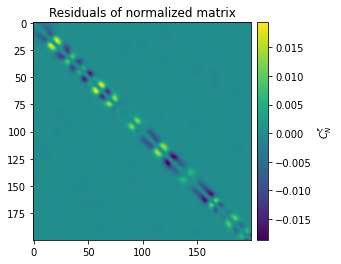

Test 3
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


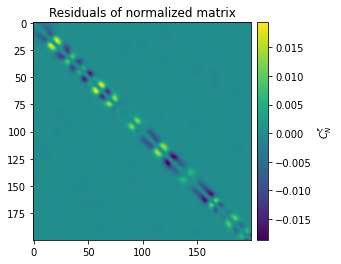

Test 3
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


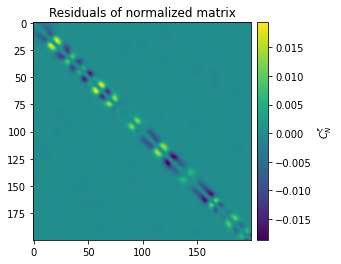

Test 3
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


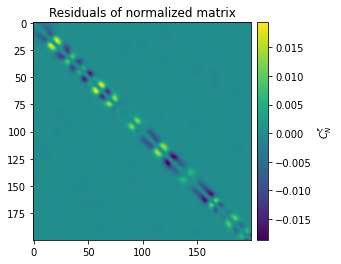

In [20]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            for n in range(Nmultipoles):
                for nn in range(n,Nmultipoles):
                    if (mulpol[test][m][mm][n][nn] or (m==n and mm==nn)):
                        print("Test", test+1)
                        if m==mm: print("Autocorrelazione misurata multipolo", 2*m)
                        else: print("Crosscorrelazione misurata multipoli", 2*m, 2*mm)
                        if n==nn: print("Verifica con autocorrelazione teorica multipolo", 2*n)
                        else: print("Verifica con crosscorrelazione teorica multipoli", 2*n, 2*nn)
                        print(mulpol[test][m][mm][n][nn])    
                        diff = R_th[test][n][nn]-R_exp[test][m][mm]
                        fig = plt.figure()
                        plt.title('Residuals of normalized matrix')
                        plt.imshow(diff, vmin=np.min(diff), vmax=np.max(diff))
                        cbar = plt.colorbar(orientation="vertical", pad=0.02)
                        cbar.set_label(r'$ C^{\xi}_{N}$')
                        plt.show()

### Grafici delle matrici dei residui normalizzate

Test 1
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


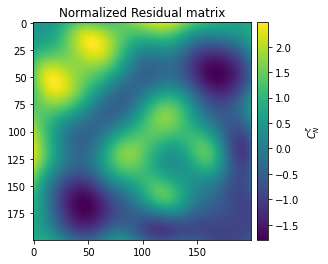

Test 1
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


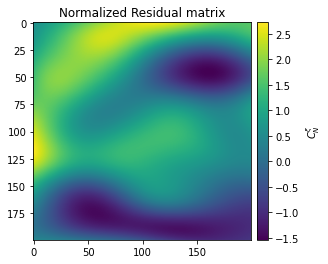

Test 1
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
False


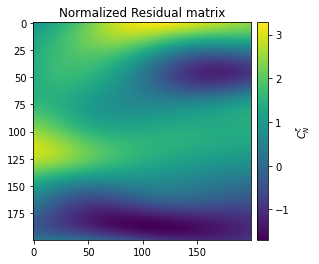

Test 1
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


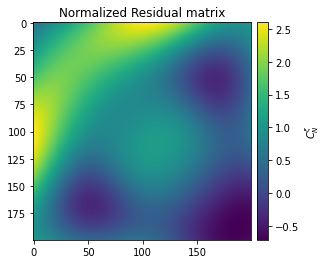

Test 1
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


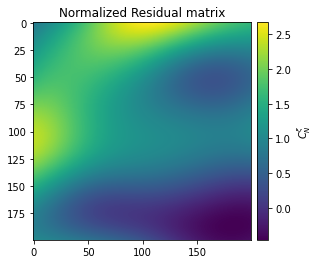

Test 1
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


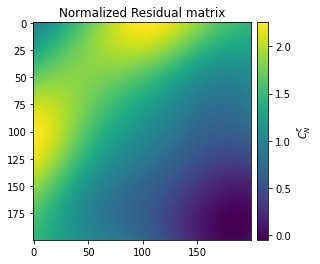

Test 2
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


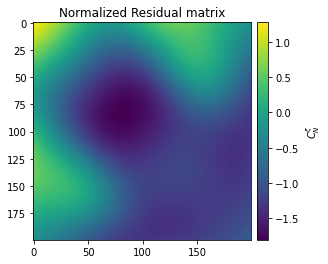

Test 2
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


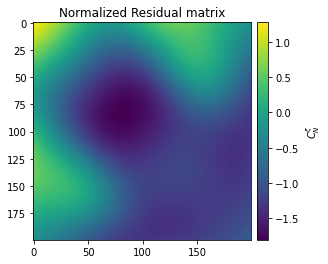

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


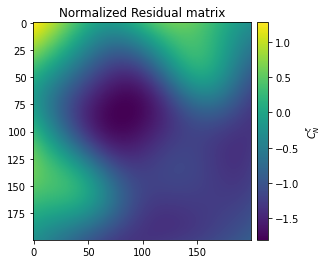

Test 2
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


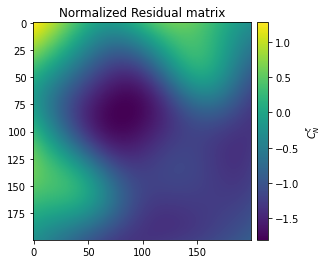

Test 2
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


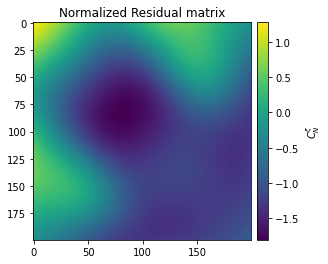

Test 2
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


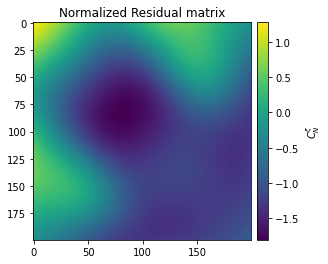

Test 2
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


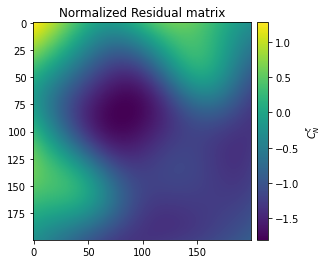

Test 2
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


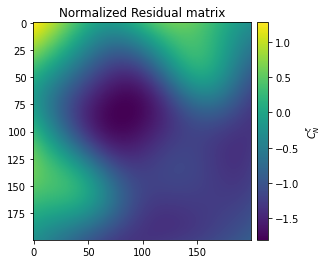

Test 3
Autocorrelazione misurata multipolo 0
Verifica con autocorrelazione teorica multipolo 0
True


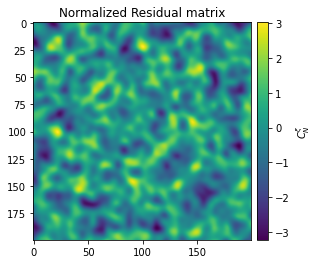

Test 3
Crosscorrelazione misurata multipoli 0 2
Verifica con crosscorrelazione teorica multipoli 0 2
True


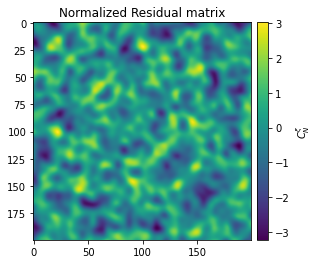

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con crosscorrelazione teorica multipoli 0 4
True


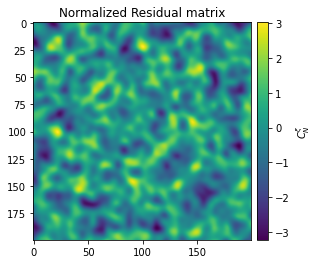

Test 3
Crosscorrelazione misurata multipoli 0 4
Verifica con autocorrelazione teorica multipolo 2
True


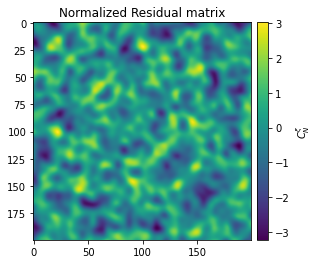

Test 3
Autocorrelazione misurata multipolo 2
Verifica con crosscorrelazione teorica multipoli 0 4
True


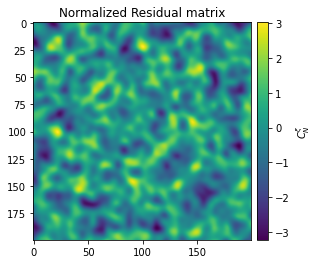

Test 3
Autocorrelazione misurata multipolo 2
Verifica con autocorrelazione teorica multipolo 2
True


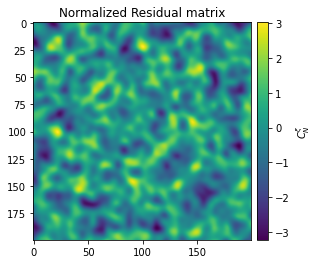

Test 3
Crosscorrelazione misurata multipoli 2 4
Verifica con crosscorrelazione teorica multipoli 2 4
True


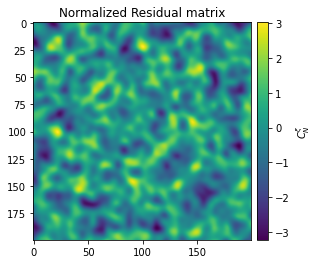

Test 3
Autocorrelazione misurata multipolo 4
Verifica con autocorrelazione teorica multipolo 4
True


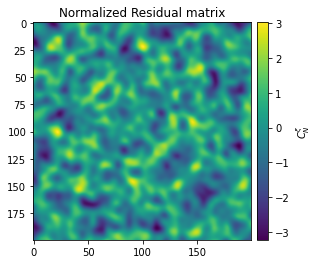

In [21]:
for test in range(Ntests):
    for m in range(Nmultipoles):
        for mm in range(m,Nmultipoles):
            for n in range(Nmultipoles):
                for nn in range(n,Nmultipoles):
                    if (mulpol[test][m][mm][n][nn] or (m==n and mm==nn)):
                        print("Test", test+1)
                        if m==mm: print("Autocorrelazione misurata multipolo", 2*m)
                        else: print("Crosscorrelazione misurata multipoli", 2*m, 2*mm)
                        if n==nn: print("Verifica con autocorrelazione teorica multipolo", 2*n)
                        else: print("Verifica con crosscorrelazione teorica multipoli", 2*n, 2*nn)
                        print(mulpol[test][m][mm][n][nn])   
                        fig = plt.figure()
                        plt.title('Normalized Residual matrix')
                        plt.imshow(Res[test][m][mm][n][nn], vmin=np.min(Res[test][m][mm][n][nn]), vmax=np.max(Res[test][m][mm][n][nn]))
                        cbar = plt.colorbar(orientation="vertical", pad=0.02)
                        cbar.set_label(r'$ C^{\xi}_{N}$')
                        plt.show()